# Decision Boundaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from sklearn.linear_model import LogisticRegression

Let us first generate training data: N points in each of C classes. Each cluster corresponds to a Gaussian, with a random center and a random standard deviation, both in a pre-defined range. 

In [2]:
N = 100
C = 5
min_center = 0
max_center = 10
min_std = 0.1
max_std = 0.5
Xtrain = np.zeros((C*N,2))
Ytrain = np.zeros(C*N)
for i in range(0,C):
    c = min_center + (max_center - min_center)*npr.rand(1,2)
    std = min_std + (max_std - min_std)*npr.rand(1,1)
    Xtrain[i*N:(i+1)*N,:] = np.ones((N,1))@c + std*npr.randn(N,2)
    Ytrain[i*N:(i+1)*N] = i

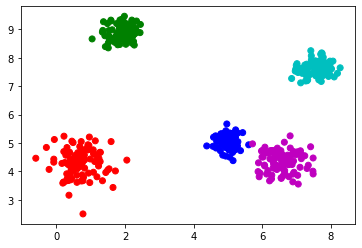

In [3]:
colors = np.array(["r","g","b","c","m","y","k"])
cols = colors[Ytrain.astype(int)]
plt.scatter(Xtrain[:,0],Xtrain[:,1],c=cols)
plt.show()

Let us now train a logistic regression classifier on this data

In [4]:
clf = LogisticRegression(max_iter=1000)
clf.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=1000)

We now generate test data by densely covering the 2D input space, and compute the predictions of our classifier for these test samples.

In [5]:
x1 = np.arange(np.min(Xtrain[:,0]),np.max(Xtrain[:,0]),0.1)
x2 = np.arange(np.min(Xtrain[:,1]),np.max(Xtrain[:,1]),0.1)
xv1, xv2 = np.meshgrid(x1,x2)
Xtest = np.hstack((xv1.reshape(-1,1),xv2.reshape(-1,1)))
Yhat = clf.predict(Xtest)

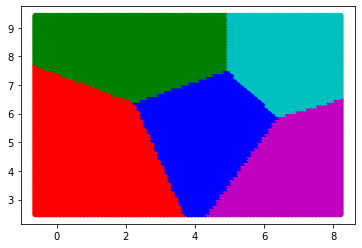

In [6]:
cols = colors[Yhat.astype(int)]
plt.scatter(Xtest[:,0],Xtest[:,1],c=cols)
plt.show()